## Statistical Analysis 

## What variables are statistically significant?

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
# load SQL 
import sqlite3
conn = sqlite3.connect("im.db")

In [6]:
top_movies_by_votes = pd.read_sql("""SELECT genres, primary_title, averagerating, start_year, numvotes
                                FROM movie_basics
                                JOIN movie_ratings
                                    USING(movie_id)
                                ORDER BY numvotes DESC
;""", conn)

In [7]:
# Load in budgets data
budgets = pd.read_csv('tn.movie_budgets.csv')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [9]:
# to change release date into a date type
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [10]:
# to change dollar variables into integer types
budgets[budgets.columns[3:]] = budgets[budgets.columns[3:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)

In [11]:
# integer conversion successful
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [12]:
# load in and clean bom movie data
bom = pd.read_csv('bom.movie_gross.csv.gz')
bom = bom.dropna(how='any',axis=0) 
bom['foreign_gross'].astype('str')
bom['foreign_gross']=bom['foreign_gross'].str.replace(',','')
bom['foreign_gross'] = bom['foreign_gross'].astype(float)

In [13]:
bom_budgets1 = pd.merge(budgets, bom, how='left',
                  left_on='movie', right_on='title')
bom_budgets1

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,NaN,NaN,nan,nan,nan
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.00,804600000.00,2011.00
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,NaN,NaN,nan,nan,nan
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,NaN,NaN,nan,nan,nan
5778,79,1999-04-02,Following,6000,48482,240495,NaN,NaN,nan,nan,nan
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,NaN,NaN,nan,nan,nan
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,NaN,NaN,nan,nan,nan


In [14]:
top_15000 = bom_budgets1.nlargest(5000, 'domestic_gross_x')
top_movie_titles = set(top_movies_by_votes.primary_title)

In [15]:
same_movies = []
for movie in top_15000.title:
    if movie in top_movie_titles:
        same_movies.append(movie)

In [16]:
len(same_movies)

998

In [17]:
filtered_imdb = top_movies_by_votes[top_movies_by_votes.primary_title.isin(same_movies)]
filtered_imdb

,genres,primary_title,averagerating,start_year,numvotes
0,"Action,Adventure,Sci-Fi",Inception,8.80,2010,1841066
1,"Action,Thriller",The Dark Knight Rises,8.40,2012,1387769
2,"Adventure,Drama,Sci-Fi",Interstellar,8.60,2014,1299334
3,"Drama,Western",Django Unchained,8.40,2012,1211405
5,"Biography,Crime,Drama",The Wolf of Wall Street,8.20,2013,1035358
...,...,...,...,...,...
72391,Drama,The Other Side of the Door,3.80,2014,5
72406,Crime,Split,6.80,2016,5
72729,Thriller,Buried,6.00,2011,5
72802,Thriller,The Call,6.60,2014,5


In [18]:
# combining the genres with the financial data from budgets and bom
merged = pd.merge(left=filtered_imdb,right=top_15000, how='left',      
left_on='primary_title', right_on='movie')

In [19]:
# drop null values
merged = merged.dropna()

In [20]:
# filtering for genres that contain 'action'
filtered_genres_action = merged[merged["genres"].str.contains("Action")]
filtered_genres_action

,genres,primary_title,averagerating,start_year,numvotes,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,"Action,Adventure,Sci-Fi",Inception,8.80,2010,1841066,38,2010-07-16,Inception,160000000,292576195,835524642,Inception,WB,292600000.00,535700000.00,2010.00
1,"Action,Thriller",The Dark Knight Rises,8.40,2012,1387769,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,The Dark Knight Rises,WB,448100000.00,636800000.00,2012.00
6,"Action,Adventure,Comedy",Guardians of the Galaxy,8.10,2014,948394,14,2014-08-01,Guardians of the Galaxy,170000000,333172112,770867516,Guardians of the Galaxy,BV,333200000.00,440200000.00,2014.00
7,"Action,Adventure,Comedy",Deadpool,8.00,2016,820847,56,2016-02-12,Deadpool,58000000,363070709,801025593,Deadpool,Fox,363100000.00,420000000.00,2016.00
8,"Action,Adventure,Sci-Fi",The Hunger Games,7.20,2012,795227,38,2012-03-23,The Hunger Games,80000000,408010692,677923379,The Hunger Games,LGF,408000000.00,286400000.00,2012.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Action,Collide,5.50,2010,12,13,2017-02-24,Collide,29200000,2280004,5466698,Collide,ORF,2300000.00,2500000.00,2017.00
1158,"Action,Sci-Fi,Thriller",The Gambler,6.10,2019,10,25,2014-12-10,The Gambler,25000000,33680992,38718031,The Gambler,Par.,33700000.00,5600000.00,2014.00
1159,"Action,Sci-Fi,Thriller",The Gambler,6.10,2019,10,50,1999-08-04,The Gambler,3000000,51773,101773,The Gambler,Par.,33700000.00,5600000.00,2014.00
1169,"Action,Sport",Stronger,8.40,2016,8,90,2017-09-22,Stronger,30000000,4211129,8786752,Stronger,RAtt.,4200000.00,4200000.00,2017.00


In [21]:
# Understanding the domestic gross income for action movies, to be used to filter on next
filtered_genres_action['domestic_gross_x'].describe()

# data is not normally distributed and is positively skewed (median < mean)
# for this analysis, we will use the median value ($55,833,596.50) to filter movies and make this the "goal" for Computing Vision

count         354.00
mean     99478358.79
std     116434570.17
min         51773.00
25%      26494644.50
50%      55833596.50
75%     129691943.25
max     700059566.00
Name: domestic_gross_x, dtype: float64

## Median Filter

In [22]:
# filter out movies that have made over this median threshold.
filtered_genres1 = filtered_genres_action[filtered_genres_action['domestic_gross_x'] >= 55833596.50]
filtered_genres1

,genres,primary_title,averagerating,start_year,numvotes,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,"Action,Adventure,Sci-Fi",Inception,8.80,2010,1841066,38,2010-07-16,Inception,160000000,292576195,835524642,Inception,WB,292600000.00,535700000.00,2010.00
1,"Action,Thriller",The Dark Knight Rises,8.40,2012,1387769,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,The Dark Knight Rises,WB,448100000.00,636800000.00,2012.00
6,"Action,Adventure,Comedy",Guardians of the Galaxy,8.10,2014,948394,14,2014-08-01,Guardians of the Galaxy,170000000,333172112,770867516,Guardians of the Galaxy,BV,333200000.00,440200000.00,2014.00
7,"Action,Adventure,Comedy",Deadpool,8.00,2016,820847,56,2016-02-12,Deadpool,58000000,363070709,801025593,Deadpool,Fox,363100000.00,420000000.00,2016.00
8,"Action,Adventure,Sci-Fi",The Hunger Games,7.20,2012,795227,38,2012-03-23,The Hunger Games,80000000,408010692,677923379,The Hunger Games,LGF,408000000.00,286400000.00,2012.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,"Action,Drama,Sport",Split,5.40,2016,189,50,2017-01-20,Split,5000000,138141585,278964806,Split,Uni.,138300000.00,140200000.00,2017.00
1065,"Action,Drama",Robin Hood,6.30,2013,78,39,2010-05-14,Robin Hood,210000000,105487148,322459006,Robin Hood,Uni.,105300000.00,216400000.00,2010.00
1079,"Action,Comedy",Pixels,4.60,2010,54,59,2015-07-24,Pixels,90000000,78765986,244041804,Pixels,Sony,78700000.00,166100000.00,2015.00
1129,Action,Ride Along,4.40,2012,14,67,2014-01-17,Ride Along,25000000,134202565,153733800,Ride Along,Uni.,134900000.00,19500000.00,2014.00


In [23]:
filtered_genres1['production_budget'].describe()

count         177.00
mean    129334463.28
std      72569982.67
min       5000000.00
25%      73000000.00
50%     130000000.00
75%     175000000.00
max     410600000.00
Name: production_budget, dtype: float64

In [24]:
# Let's say that Computing Vision wants to make the median ($55,833,596.50) amount fot gross domestic income on
#     their first film.
# Computing Vision believes a modest budget of $25,000,000 will be enough to reach their goal. Is this true?

# Ho: A production budget of $25,000,000 is not enough to make the median amount of gross income. (mu <= x-bar)
# Ha: A production budget of $25,000,000 is enough to make the median amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)

In [25]:
# computing z-statistic using the population production budget mean and standard deviation
import scipy.stats as stats
from math import sqrt
x_bar = 25000000 # sample mean 
n = 177 # number of movies
sigma = 72569982.67 # sd of population
mu = 129334463.28 # Population mean 

z = (x_bar - mu)/(sigma/sqrt(n))
z

-19.12746430142528

In [26]:
# computing p-value
p = stats.norm.cdf(z)

In [27]:
pval = 1 - p
pval

1.0

In [28]:
# with a p-value of 1, we can confidently reject the null hypothesis and conclude that a $25,000,000 budget is not enough
#     to make domestic gross income of $55,833,596.50.

# p > a; fail to rejct the null hypothesis and conclude with 95% confidence that this budget will not help them reach the goal.

In [29]:
# What production budget will allow Computing Vision to make at least $55,833,596.50 in gross domestic income?
# Would a $50,000,000 budget allow for this to happen?

# Ho: A production budget of $50,000,000 is not enough to make the median amount of gross income. (mu <= x-bar)
# Ha: A production budget of $50,000,000 is enough to make the median amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)

In [30]:
x_bar1 = 50000000 # sample mean 
n1 = 177 # number of movies
sigma1 = 72569982.67 # sd of population
mu1 = 129334463.28 # Population mean 

z1 = (x_bar1 - mu1)/(sigma1/sqrt(n1))
z1

-14.544255719115007

In [31]:
# computing p-value
p1 = stats.norm.cdf(z1)

In [32]:
pval1 = 1 - p1
pval1

# p > a; fail to rejct the null hypothesis and conclude with 95% confidence that this budget will not help them reach the goal.

1.0

In [33]:
# doubling their initial modest budget does not get them to their goal; they will likely need to spend more
# try $68,000,000

# Ho: A production budget of $68,000,000 is not enough to make the median amount of gross income. (mu <= x-bar)
# Ha: A production budget of $68,000,000 is enough to make the median amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)

In [34]:
x_bar2 = 139000000 # sample mean 
n2 = 177 # number of movies
sigma2 = 72569982.67 # sd of population
mu2 = 129334463.28 # Population mean 

z2 = (x_bar2 - mu2)/(sigma2/sqrt(n2))
z2

1.771966833909563

In [35]:
# computing p-value
p2 = stats.norm.cdf(z2)

In [36]:
pval2 = 1 - p2
pval2

# p < a; rejct the null hypothesis and conclude with 95% confidence that this budget will help them reach the goal. 

0.03820003143450934

## Mean Filter

In [37]:
# filter out movies that have made over this median threshold.
filtered_genres2 = filtered_genres_action[filtered_genres_action['domestic_gross_x'] >= 99478358.79]
filtered_genres2

,genres,primary_title,averagerating,start_year,numvotes,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,"Action,Adventure,Sci-Fi",Inception,8.80,2010,1841066,38,2010-07-16,Inception,160000000,292576195,835524642,Inception,WB,292600000.00,535700000.00,2010.00
1,"Action,Thriller",The Dark Knight Rises,8.40,2012,1387769,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,The Dark Knight Rises,WB,448100000.00,636800000.00,2012.00
6,"Action,Adventure,Comedy",Guardians of the Galaxy,8.10,2014,948394,14,2014-08-01,Guardians of the Galaxy,170000000,333172112,770867516,Guardians of the Galaxy,BV,333200000.00,440200000.00,2014.00
7,"Action,Adventure,Comedy",Deadpool,8.00,2016,820847,56,2016-02-12,Deadpool,58000000,363070709,801025593,Deadpool,Fox,363100000.00,420000000.00,2016.00
8,"Action,Adventure,Sci-Fi",The Hunger Games,7.20,2012,795227,38,2012-03-23,The Hunger Games,80000000,408010692,677923379,The Hunger Games,LGF,408000000.00,286400000.00,2012.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,"Action,Animation,Comedy",The Angry Birds Movie,6.30,2016,69624,77,2016-05-20,The Angry Birds Movie,73000000,107509366,352327887,The Angry Birds Movie,Sony,107500000.00,244800000.00,2016.00
761,"Action,Adventure,Thriller",Robin Hood,5.30,2018,41588,39,2010-05-14,Robin Hood,210000000,105487148,322459006,Robin Hood,Uni.,105300000.00,216400000.00,2010.00
1044,"Action,Drama,Sport",Split,5.40,2016,189,50,2017-01-20,Split,5000000,138141585,278964806,Split,Uni.,138300000.00,140200000.00,2017.00
1065,"Action,Drama",Robin Hood,6.30,2013,78,39,2010-05-14,Robin Hood,210000000,105487148,322459006,Robin Hood,Uni.,105300000.00,216400000.00,2010.00


In [38]:
filtered_genres2['production_budget'].describe()

count         117.00
mean    150681196.58
std      70235544.51
min       5000000.00
25%     104000000.00
50%     150000000.00
75%     190000000.00
max     410600000.00
Name: production_budget, dtype: float64

In [39]:
# Let's say that Computing Vision wants to make the mean ($150,681,196.58) amount fot gross domestic income on
#     their first film.
# Computing Vision believes a modest budget of $25,000,000 will be enough to reach their goal. Is this true?

# Ho: A production budget of $25,000,000 is not enough to make the mean amount of gross income. (mu <= x-bar)
# Ha: A production budget of $25,000,000 is enough to make the mean amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)

In [40]:
# computing z-statistic using the population production budget mean and standard deviation
x_barm = 25000000 # sample mean 
nm = 117 # number of movies
sigmam = 70235544.51 # sd of population
mum = 150681196.58 # Population mean 

zm = (x_barm - mum)/(sigmam/sqrt(nm))
zm

-19.35558420422045

In [41]:
pm = stats.norm.cdf(zm)

In [42]:
pvalm = 1 - pm
pvalm

1.0

In [43]:
# with a p-value of 1, we can confidently reject the null hypothesis and conclude that a $25,000,000 budget is not enough
#     to make domestic gross income of $150,681,196.58.

# p > a; fail to rejct the null hypothesis and conclude with 95% confidence that this budget will not help them reach the goal.

In [44]:
# What production budget will allow Computing Vision to make at least $150,681,196.58 in gross domestic income?
# Would a $50,000,000 budget allow for this to happen?

# Ho: A production budget of $50,000,000 is not enough to make the median amount of gross income. (mu <= x-bar)
# Ha: A production budget of $50,000,000 is enough to make the median amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)

In [45]:
x_barm1 = 50000000 # sample mean 
nm1 = 117 # number of movies
sigmam1 = 70235544.51 # sd of population
mum1 = 150681196.58 # Population mean 

zm1 = (x_barm1 - mum1)/(sigmam1/sqrt(nm1))
zm1

-15.50544895509032

In [46]:
pm1 = stats.norm.cdf(zm1)

In [47]:
pvalm1 = 1 - pm1
pvalm1

# p > a; fail to rejct the null hypothesis and conclude with 95% confidence that this budget will not help them reach the goal.

1.0

In [48]:
# doubling their initial modest budget does not get them to their goal; they will likely need to spend more
# try $161,500,000

# Ho: A production budget of $161,500,000 is not enough to make the median amount of gross income. (mu <= x-bar)
# Ha: A production budget of $161,500,000 is enough to make the median amount of gross income. (mu > x-bar)

# significance is alpha = 0.05 (95% confidence)

In [52]:
x_barm2 = 161500000 # sample mean 
nm2 = 117 # number of movies
sigmam2 = 70235544.51 # sd of population
mum2 = 150681196.58 # Population mean 

zm2 = (x_barm2 - mum2)/(sigmam2/sqrt(nm2))
zm2

1.6661542560300622

In [53]:
pm2 = stats.norm.cdf(zm2)

In [54]:
pvalm2 = 1 - pm2
pvalm2

# p < a; rejct the null hypothesis and conclude with 95% confidence that this budget will help them reach the goal. 

0.0478413471867809

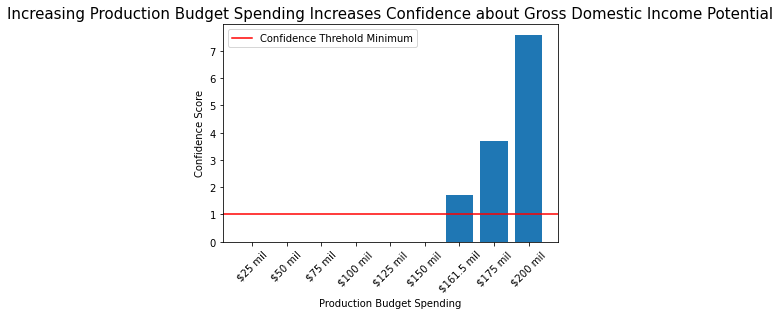

In [14]:
import matplotlib.pyplot as plt

data = {'$25 mil': 0, '$50 mil': 0, '$75 mil': 0, '$100 mil': 0, '$125 mil': 0, '$150 mil':0, '$161.5 mil': 1.7, '$175 mil': 3.7, '$200 mil':7.6}
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.axhline(y = 1.0, color = 'r', linestyle = '-', label = 'Confidence Threhold Minimum')
plt.xticks(rotation = 45)
#plt.yticks([])
#plt.tick_params(left=False)
plt.ylabel('Confidence Score')
plt.xlabel('Production Budget Spending', fontsize=10)
plt.title('Increasing Production Budget Spending Increases Confidence about Gross Domestic Income Potential', fontsize=15)
plt.legend(loc = 'upper left')
#plt.suptitle('The more prroduction budget the more confidence gross domestic income will reach at least $150,681,196.58')